# MFW 2005 + flopy + matplotlib
## Luis M. de la Cruz

<font color=#FF0000>**Última actualización: mar may 26 17:43:45 CDT 2020**</font>

En este ejemplo se mostrará cómo leer la salida de MODFLOW y cómo visualizarla usando las herramientas de Matplotlib.

## Paso 9.

MODFLOW escribe los resultados en formato binario. Flopy ofrece herramientas para leer esos datos. 

In [1]:
# Importamos las bibliotecas
import numpy as np
import flopy

# Importamos las herramientas de MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline

flopy is installed in /home/luiggi/anaconda3/lib/python3.7/site-packages/flopy


In [66]:
# Definimos el nombre de la simulación
modelname = 'ejem_01_MF2005'

# Detalles del ejemplo
Lx = 1000.
Ly = 1000.
ztop = 0.
zbot = -50.
nlay = 1
nrow = 20
ncol = 15
delr = Lx/ncol
delc = Ly/nrow
delv = (ztop - zbot) / nlay

In [67]:
# Se importa la herramienta para leer los archivos binarios.
import flopy.utils.binaryfile as bf

# Lectura de la salida de MODFLOW
hds = bf.HeadFile(modelname+'.hds')
head = hds.get_data(totim=1.0)

# Alternativamente se puede usar lo siguiente para leer los datos
#times = hds.get_times()
#head = hds.get_data(totim=times[-1])

print(type(hds), type(head), sep='\n')

<class 'flopy.utils.binaryfile.HeadFile'>
<class 'numpy.ndarray'>


In [4]:
print(head)

[[[10.          8.266618    6.592753    5.0561123   3.759347
    2.7926269   2.118562    1.6550728   1.3241142   1.0651025
    0.8399794   0.62799114  0.41925588  0.2100797   0.        ]
  [10.          8.23314     6.5155644   4.921182    3.5736969
    2.6280081   2.0001128   1.5805244   1.2836441   1.0460402
    0.83259106  0.62616134  0.4195039   0.21058793  0.        ]
  [10.          8.171939    6.3690796   4.6473722   3.1620357
    2.2846308   1.7644912   1.436953    1.2098308   1.0133908
    0.8212543   0.62445956  0.42102233  0.21203665  0.        ]
  [10.          8.096562    6.176947    4.240604    2.4084127
    1.7402918   1.4205312   1.2368971   1.1187589   0.97832054
    0.81253785  0.6264943   0.42566174  0.21520157  0.        ]
  [10.          8.030287    5.9942236   3.7752502   1.
    1.          1.          1.          1.040231    0.9575065
    0.8152181   0.63684773  0.43571675  0.2210335   0.        ]
  [10.          8.001332    5.9143867   3.6228023   1.
    1.      

## Paso 10.

Visualización de los resultados con **matplotlib**.
(<a href="../MatplotLib3.ipynb">Mini tutorial de Matplotlib 3 </a>)

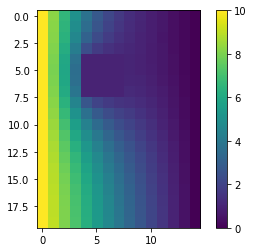

In [68]:
# Hacemos una gráfica de "falso color"
# Puede probar varios cmap : 'cool', 'hot', 'coolwarm', 'inferno', 'Greys', 'terrain', 'GnBu'
# Checa más mapas de color en: https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
plt.imshow(head[0, :, :])
plt.colorbar()

### Contornos 
Para mejorar la gráfica haremos contornos usando varios niveles

In [69]:
# Definimos el número de contornos a graficar
levels = np.linspace(0.,10.,51)  # Pruebe cambiando el 11

# Definimos la extensión del dominio
extent = (0,Lx,0,Ly)

print(type(levels))
print(levels, extent, sep='\n')

<class 'numpy.ndarray'>
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10. ]
(0, 1000.0, 0, 1000.0)


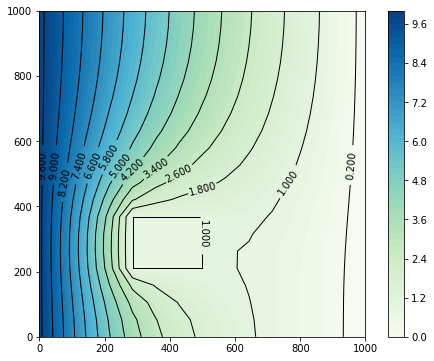

In [70]:
# Creamos una gráfica
fig = plt.figure(figsize=(8,6))
axs = plt.gca() # Obtiene los ejes (Axes)
axs.set_aspect('equal')

# Definimos el mapa de color
mapa_color = 'GnBu'

# Creamos contornos "llenos"
cf = axs.contourf(head[0, :, :], levels=levels, extent=extent, cmap=mapa_color)

# Creamos contornos con líneas, pruebe levels[1:-1:2]
cl = axs.contour(head[0, :, :], levels=levels[1:-1:4], extent=extent, colors='black', linewidths=1.0)

#Ponemos etiquetas a los contornos
axs.clabel(cl, inline=True, fontsize=10)

plt.colorbar(cf)

### Función

Hagamos más funcional el asunto:

In [71]:
def dibuja_contornos(datos, ini, fin, num, salto=1, extent = (0, Lx, 0, Ly), mapa_color = 'GnBu' ):
    """
    Esta construye y dibuja los contornos.
    
    Parameters
    ----------
    axs: Axes
    Ejes de la gráfica.
    
    datos: numpy array like
    Arreglo con los datos a graficar.
    
    ini: float
    Inicio de los niveles.
    
    fin: float
    Fin de los niveles.
    
    num: int
    Número de niveles

    salto: int
    Salto para el dibujo de los contornos de tipo línea.
    
    extent: tuple
    Tupla con los límites de la gráfica (xmin, xmax, ymin, ymax)
    
    mapa_color: string
    Mapa de color para el dibujo.
    """
    fig = plt.figure(figsize=(8,6))
    axs = fig.gca()
    
    axs.set_aspect('equal')

    levels = np.linspace(ini, fin, num)
    
    # Creamos contornos "llenos"
    cf = axs.contourf(datos[0, :, :], levels=levels, extent=extent, cmap=mapa_color)

    # Creamos contornos con líneas
    cl = axs.contour(datos[0, :, :], levels=levels[1:-1:salto], extent=extent, colors='black', linewidths=1.0)

    # Ponemos etiquetas a los contornos
    axs.clabel(cl, inline=1, fontsize=10)

    plt.colorbar(cf)

Text(0.5, 1.0, 'Carga hidráulica')

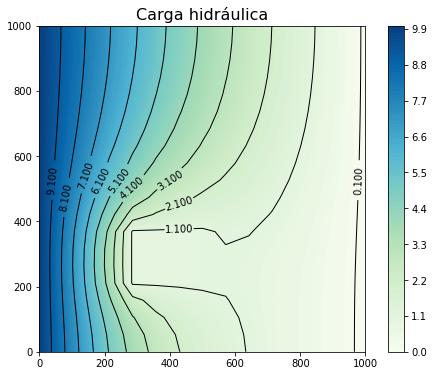

In [72]:
dibuja_contornos(head, 0., 10., 101, 10)
plt.title('Carga hidráulica', fontsize=16)
#plt.savefig('carga.png')

### Usando un slider

In [73]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [74]:
# Construimos un slider
w = interact(dibuja_contornos, 
             datos = fixed(head), 
             ini   = fixed(0.0), 
             fin   = fixed(10.0), 
             num   = 11, #widgets.IntSlider(min=5, max=50, step=5, value=10),
             salto  = fixed(1), #widgets.IntSlider(min=1, max=5, step=1, value=1),
             extent = fixed((0,Lx,0,Ly)),
             mapa_color = fixed('GnBu'))

display(w)

interactive(children=(IntSlider(value=11, description='num', max=33, min=-11), Output()), _dom_classes=('widge…

<function __main__.dibuja_contornos(datos, ini, fin, num, salto=1, extent=(0, 1000.0, 0, 1000.0), mapa_color='GnBu')>

### Dibujar la velocidad

In [75]:
def Darcy(head, kx, ky):
    """
    Calcula la velocidad de a partir de la carga hidráulica.
    
    Parameters
    ----------
    head: numpy array
    Carga hidráyulica
    
    kx
    --
    Conductividad hidráulica en dirección x.
    
    ky
    --
    Conductividad hidráulica en dirección y.
    
    Returns
    -------
    Tupla con la velocidad, (vx, vy), calculada sobre los centros de las
    celdas de la malla.
    
    """
    vx = np.zeros((nrow-1, ncol-1))
    vy = np.zeros((nrow-1, ncol-1))

    for i in range(0,nrow-1):
        for j in range(0,ncol-1):
            vx[i,j] = - kx * (head[0,i,j+1] - head[0,i,j]) / delc
            vy[i,j] = - ky * (head[0,i+1,j] - head[0,i,j]) / delr

    return vx, vy

In [76]:
#Cálculo de la velocidad
velx, vely = Darcy(head, kx = 10, ky = 10)

# Malla donde se dibuja la velocidad
x = np.linspace(0+delc*0.5, Lx - delc*0.5, ncol - 1)
y = np.linspace(0+delr*0.5, Ly - delr*0.5, nrow - 1)
xg, yg = np.meshgrid(x,y)

In [77]:
print(velx)

[[ 0.34667645  0.33477297  0.30732813  0.25935307  0.19334402  0.13481297
   0.09269783  0.06619172  0.05180235  0.04502461  0.04239765  0.04174705
   0.04183524  0.04201594]
 [ 0.353372    0.34351511  0.31887646  0.26949706  0.18913774  0.12557907
   0.08391767  0.05937607  0.04752078  0.04268982  0.04128594  0.04133149
   0.04178319  0.04211759]
 [ 0.36561222  0.36057186  0.34434147  0.29706731  0.17548099  0.10402792
   0.06550765  0.04542444  0.039288    0.03842729  0.03935895  0.04068745
   0.04179713  0.04240733]
 [ 0.38068752  0.38392305  0.38726864  0.36643825  0.13362417  0.06395214
   0.03672681  0.02362764  0.02808768  0.03315654  0.03720871  0.04016651
   0.04209203  0.04304031]
 [ 0.39394264  0.40721264  0.44379468  0.55505004 -0.         -0.
  -0.         -0.0080462   0.0165449   0.02845768  0.03567407  0.0402262
   0.04293665  0.0442067 ]
 [ 0.39973354  0.41738911  0.4583169   0.52456045 -0.         -0.
  -0.         -0.00617306  0.01213362  0.02640054  0.03563809  0.041

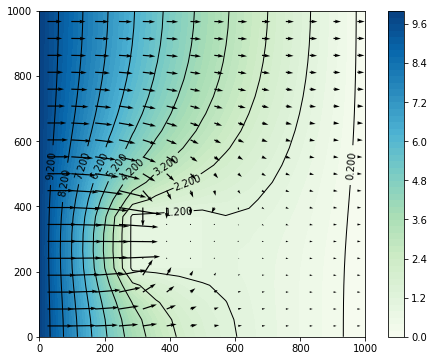

In [79]:
dibuja_contornos(head, 0., 10., 51, 5)
plt.quiver(xg,yg,velx,vely)
#plt.streamplot(xg,yg,velx,vely, color='purple')

### Varias subgráficas

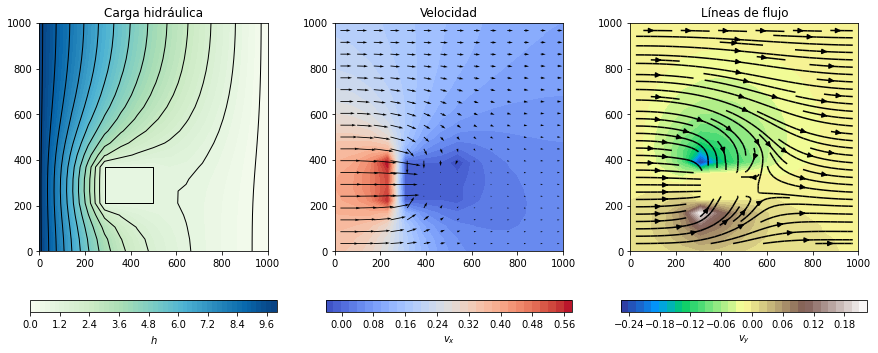

In [80]:
levels = np.linspace(0.,10.,51)
salto = 4

plt.figure(figsize=(15,6))

plt.subplot(131)
cf = plt.contourf(head[0, :, :], levels=levels, extent=extent, cmap=mapa_color)
plt.contour(head[0, :, :], levels=levels[1:-1:salto], extent=extent, colors='black', linewidths=1.0)
plt.clabel(cl, inline=1, fontsize=10)
plt.gca().set_aspect('equal')
plt.colorbar(cf, orientation='horizontal', label='$h$')
plt.title('Carga hidráulica')

plt.subplot(132)
cf = plt.contourf(velx, levels=30, extent=extent, cmap='coolwarm')
plt.quiver(xg,yg,velx,vely)
plt.xlim((0,Lx))
plt.ylim(0,Ly)
plt.gca().set_aspect('equal')
plt.colorbar(cf, orientation='horizontal', label='$v_x$')
plt.title('Velocidad')

plt.subplot(133)
cf = plt.contourf(vely, levels=30, extent=extent, cmap='terrain')
plt.streamplot(xg,yg,velx,vely, color='k')
plt.xlim((0,Lx))
plt.ylim(0,Ly)
plt.gca().set_aspect('equal')
plt.colorbar(cf, orientation='horizontal', label='$v_y$')
plt.title('Líneas de flujo')

plt.savefig('vis.pdf')

### Siguiente paso:

Continuar con el ejercicio de visualización en: <a href="./MF2005-Vis2.ipynb">MF2005-Vis2 </a>